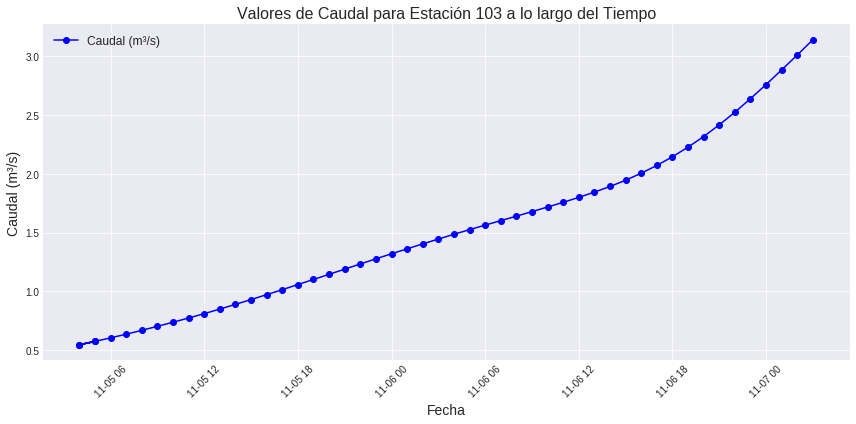

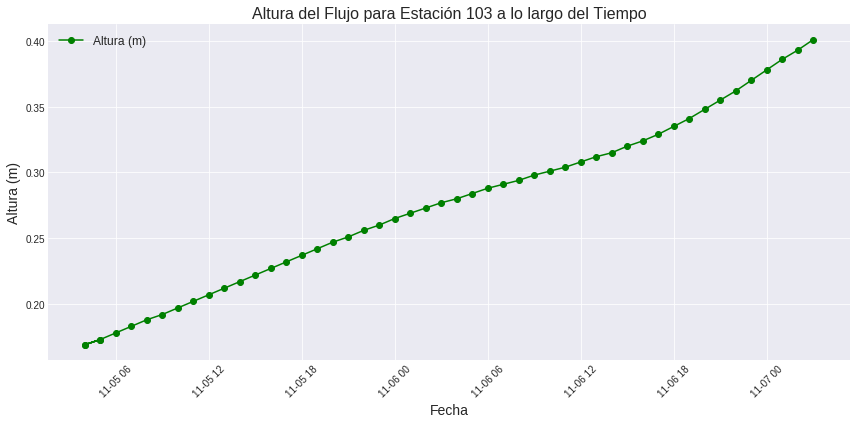

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

numero_estacion = 103  

def leer_archivo_y_extraer_datos(file_path, numero_estacion):
    fechas = []
    caudales = []
    alturas = []

    with open(file_path, 'r') as file:
        for linea in file:
            campos = linea.strip().split(',')
            if len(campos) > 7:
                fecha_hora = campos[1].strip()
                estacion_index = int(campos[2].strip())
                
                if estacion_index == numero_estacion:
                    caudal = float(campos[5].strip())  # Columna 6: caudal en m³/s
                    altura = float(campos[7].strip())  # Columna 8: altura en m
                    try:
                        fechas.append(datetime.strptime(fecha_hora, '%Y-%m-%d %H:%M:%S'))
                    except ValueError as e:
                        print(f"Error al convertir la fecha: {fecha_hora} - {e}")
                        continue  
                    
                    caudales.append(caudal)
                    alturas.append(altura)

    return fechas, caudales, alturas

file_path = "/home/alexis/Escritorio/home/hydro_wrf/trunk/NDHMS/Run/frxst_pts_out.txt"
fechas, caudales, alturas = leer_archivo_y_extraer_datos(file_path, numero_estacion)

datos = pd.DataFrame({'Fecha': fechas, 'Caudal (m³/s)': caudales, 'Altura (m)': alturas})

plt.style.use('seaborn-darkgrid')

plt.figure(figsize=(12, 6))
plt.plot(datos['Fecha'], datos['Caudal (m³/s)'], marker='o', linestyle='-', color='b', label='Caudal (m³/s)')
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Caudal (m³/s)', fontsize=14)
plt.title(f'Valores de Caudal para Estación {numero_estacion} a lo largo del Tiempo', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('caudal.png') 
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(datos['Fecha'], datos['Altura (m)'], marker='o', linestyle='-', color='g', label='Altura (m)')
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Altura (m)', fontsize=14)
plt.title(f'Altura del Flujo para Estación {numero_estacion} a lo largo del Tiempo', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('altura.png')  
plt.show()
